In [1]:
import numpy as np
import read_bs
import matplotlib.pyplot as plt



In [2]:
path_to_bs_data = "/scratch/yashraj/ska_ch_inference/data/cbin/bs_data_out"
paths_params = [ "Lightcone_HII_EFF_FACTOR_400_Samples_Plus", "Lightcone_HII_EFF_FACTOR_400_Samples_Minus","Lightcone_ION_Tvir_MIN_400_Samples_Plus",
                "Lightcone_ION_Tvir_MIN_400_Samples_Minus", "Lightcone_R_BUBBLE_MAX_400_Samples_Plus", "Lightcone_R_BUBBLE_MAX_400_Samples_Minus"]
paths = [path_to_bs_data + "/" + path for path in paths_params]
bs_data_cov_path = "/scratch/yashraj/ska_ch_inference/data/cbin/ska_AA_star_1000/Lightcone_FID_400_Samples_with_noise/bs_data_out"


In [ ]:
num_k1_values = 40
data_bs_unique = np.zeros((6,399,num_k1_values,10,10))
data_bs_fidu_ska_AA_star_1000 = np.zeros((399,num_k1_values,10,10)) 
data_bs_squeezed = np.zeros((6,399,num_k1_values))
data_bs_fidu_ska_AA_star_1000_squeezed = np.zeros((399,num_k1_values))
delta_params = [10, 10,pow(10,4.740362689494244)-pow(10,4.653212513775344) ] 


In [4]:
for i in range(len(paths)): # Bispectrum values for the given data
    for j in range(399):
       bs_data = read_bs.Auto_BS_Data("{}/realization_{}".format(paths[i], int(j)))
       k1_values, mu_bin, t_bin,data_bs_unique[i,j,:,:,:] , ntri, bispec = bs_data.read_bispec_data()
       data_bs_squeezed[i,j,:] = bs_data.get_squeezed_limit()

for j in range(399):  # Fiducial map with telescopic noise of SKA 1000 h
    bs_data = read_bs.Auto_BS_Data("{}/realization_{}".format(bs_data_cov_path, int(j)))
    k1_values, mu_bin, t_bin,data_bs_fidu_ska_AA_star_1000[j,:,:,:] , ntri, bispec = bs_data.read_bispec_data()
    data_bs_fidu_ska_AA_star_1000_squeezed[j,:] = bs_data.get_squeezed_limit()


Text(0, 0.5, '$B(k_1, n, \\cos \\theta)$ [mK$^3$]')

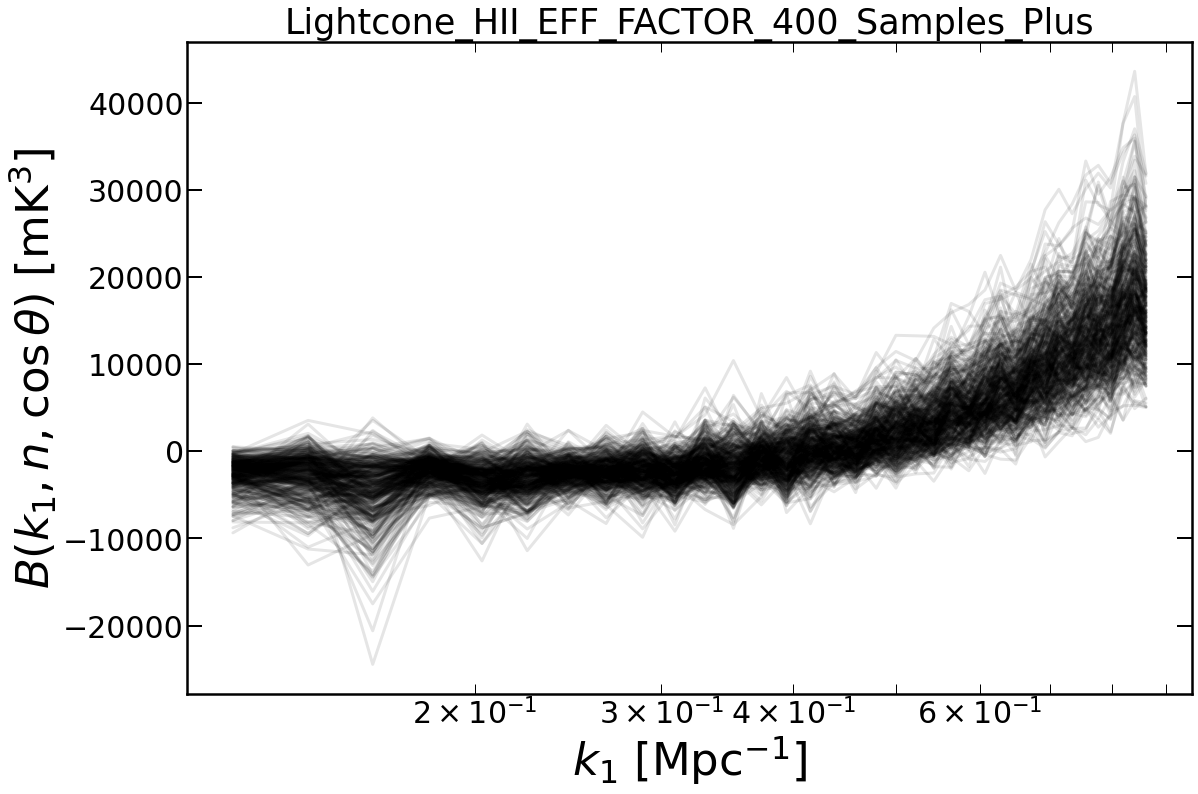

In [ ]:
# fig, ax = plt.subplots(figsize=(18, 12))
# param_index = 0
# plt.title(paths_params[param_index])
# for i in range(399):
#     ax.plot(k1_values, data_bs_squeezed[param_index,i,:], color="black", alpha=0.1)
# ax.set_xscale("log")
# # ax.set_yscale("symlog")
# ax.set_xlabel(r"$k_1$ [Mpc$^{-1}$]")
# ax.set_ylabel(r"$B(k_1, n, \cos \theta)$ [mK$^3$]")

In [5]:
der_sq_HII_EFF_sq = data_bs_squeezed[0, :, :] - data_bs_squeezed[1, :, :] / delta_params[0]
der_sq_Tvir_MIN_sq = data_bs_squeezed[2, :, :] - data_bs_squeezed[3, :, :] / delta_params[2]
der_sq_R_BUBBLE_MAX_sq = data_bs_squeezed[4, :, :] - data_bs_squeezed[5, :, :] / delta_params[1]

(399, 40)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$\\partial B(k_1, n, \\cos \\theta) / \\partial p$ [mK$^3$]')

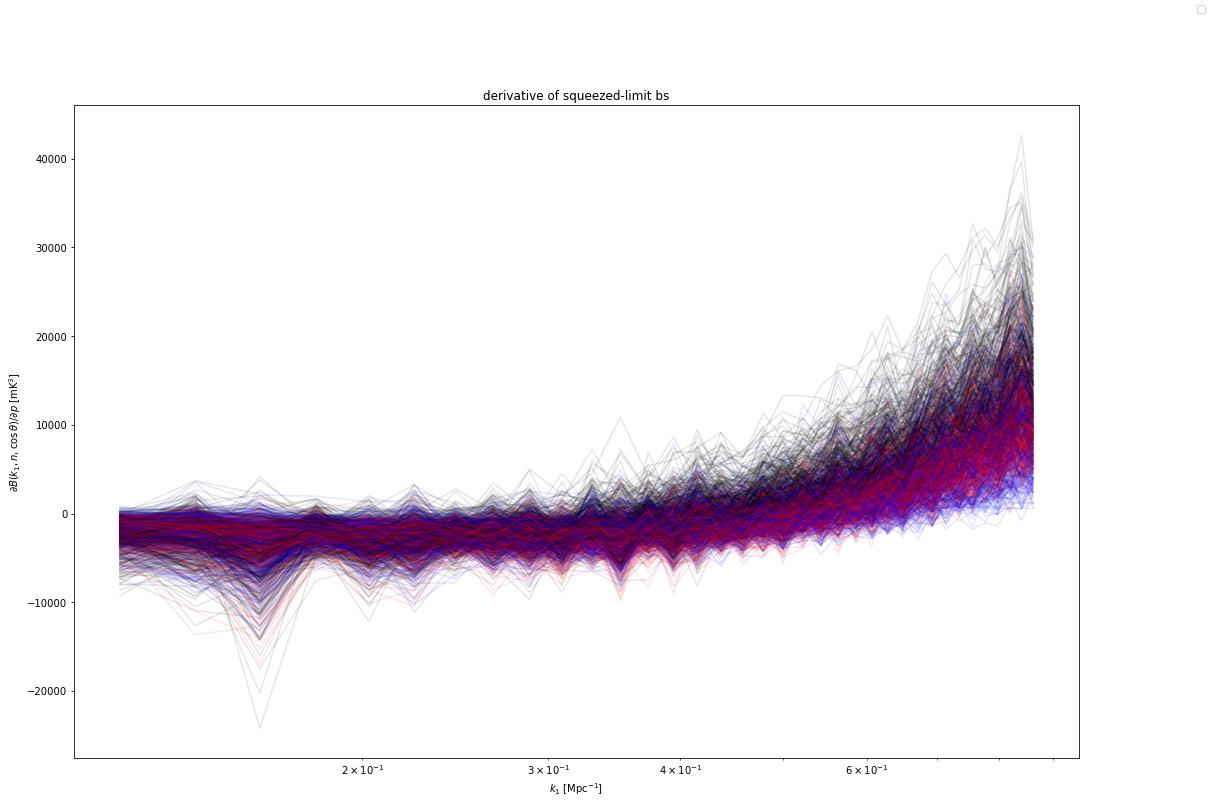

In [ ]:
# fig1, ax1 = plt.subplots(figsize=(18, 12))
# plt.title("derivative of squeezed-limit bs")
# for i in range(399):
#     ax1.plot(k1_values, der_sq_HII_EFF_sq[i, :], color="black", alpha=0.1)
#     ax1.plot(k1_values, der_sq_Tvir_MIN_sq[i,:], color="red", alpha=0.1)
#     ax1.plot(k1_values, der_sq_R_BUBBLE_MAX_sq[i,:], color = 'blue', alpha = 0.1)
# ax1.set_xscale("log")
# fig1.legend()
# # ax1.set_yscale("symlog")
# ax1.set_xlabel(r"$k_1$ [Mpc$^{-1}$]")
# ax1.set_ylabel(r"$\partial B(k_1, n, \cos \theta) / \partial p$ [mK$^3$]")


In [7]:
data_bs_fidu_ska_AA_star_1000_squeezed.shape

(399, 40)

In [7]:
sigma_sq = np.zeros(num_k1_values)
for i in range(num_k1_values):
    sigma_sq[i] = np.std(data_bs_fidu_ska_AA_star_1000_squeezed[:, i])

In [ ]:
sigma_sq_ = sigma_sq[4:] # ignoring the NaN values of the first 4 k1 modes
# sigma_sq_

array([ 294.48519867,  610.39135318,  864.88060896,  744.55538165,
       1248.55665691, 2142.21719562, 2207.0805181 , 3349.07935073,
       5027.73003344, 4641.85252627, 7351.10993309, 8015.36692633,
       7023.63892543, 9047.43895553, 8763.18998949, 6584.49979996,
       4568.52565795, 5350.19778469, 4810.70077177, 3383.52077641,
       3152.29585825, 3025.24711123, 2420.435467  , 2004.87261331,
       1987.06578582, 1480.2554661 , 1184.33246761, 1096.38371653,
       1019.23628195,  872.32890676,  727.70774614,  643.5590999 ,
        901.5598615 ,  869.97910167, 1393.75592027,  922.04061643])

In [8]:
data_bs_fidu_ska_AA_star_1000_squeezed_ = data_bs_fidu_ska_AA_star_1000_squeezed[:,4:] # removing the first 4 k1 values

In [21]:
cov_field = data_bs_fidu_ska_AA_star_1000_squeezed_[:]/sigma_sq_

In [22]:
covariance = np.cov(cov_field, rowvar=False)
print(f'log Condition number of the covariance matrix: {np.log10(np.linalg.cond(covariance)):.2f} (should be <= 7).')

log Condition number of the covariance matrix: 0.55 (should be <= 7).


In [23]:
from matplotlib import colors

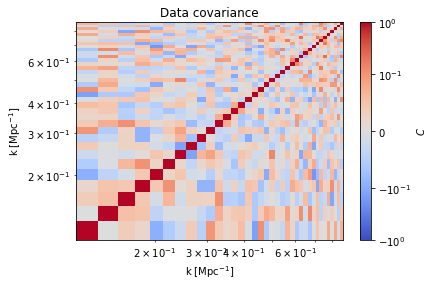

In [24]:
plt.figure()
plt.pcolormesh(k1_values[4:], k1_values[4:], covariance, cmap='coolwarm', norm=colors.SymLogNorm(linthresh=.1, vmin=-1., vmax=1.))
plt.xscale('log')
plt.yscale('log')
plt.title('Data covariance')
plt.xlabel('k [Mpc$^{-1}$]')
plt.ylabel('k [Mpc$^{-1}$]')
plt.colorbar(label=r'$C$')

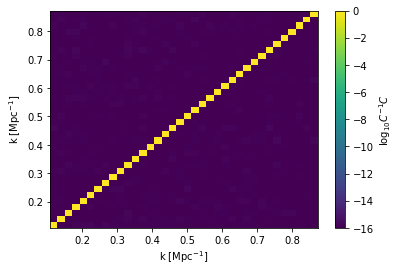

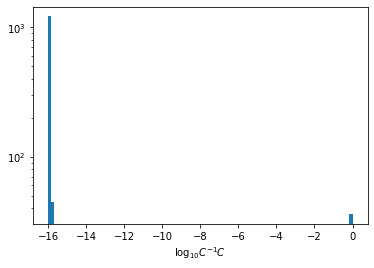

In [15]:
# Checking stability of the covariance by looking at the value of the off-diagonal terms of Sigma dot Sigma-1
I = np.log10(abs(np.matmul(np.linalg.inv(covariance), covariance))+1e-16)

plt.figure()
plt.pcolormesh(k1_values[4:], k1_values[4:], I)
plt.colorbar().set_label('log$_{10} C^{-1}C$')
plt.xlabel('k [Mpc$^{-1}$]')
plt.ylabel('k [Mpc$^{-1}$]')

plt.figure()
plt.hist(I[I!=1.].reshape(-1), bins=100)
plt.xlabel('log$_{10} C^{-1}C$')
plt.yscale('log')

In [16]:
n_samp = 400
nparams = 3

In [ ]:
# der_sq_Tvir_MIN_sq[:,4:]

array([[ -2759.91248821,  -1305.87136513,  -2300.74207266, ...,
          7840.4048625 ,   7517.9828912 ,   8309.14555877],
       [ -6428.37405051,  -3528.57277659, -12650.52591214, ...,
         12271.19199013,  13512.38336661,  10024.36748263],
       [ -1267.65535921,  -2374.18406522,   -367.04356148, ...,
          7675.89349617,   7531.64270684,   8901.88724143],
       ...,
       [  -423.2975499 ,   -338.77121454,  -2682.75383061, ...,
          8919.77988954,   7895.88168479,  11119.25207679],
       [ -4725.08872753,  -3278.54985792,  -1298.0072945 , ...,
         19248.25628792,  17416.90401311,  16291.61147272],
       [  -436.69292289,  -1622.52002408,   -867.27824554, ...,
          7749.80277718,   5074.22861629,   4381.30157954]])

In [ ]:
# deriv_field[0,:,:]

array([[ -9.37199051,  -2.13940017,  -2.6601846 , ...,   9.01217609,
          5.39404553,   9.01169147],
       [-21.82919237,  -5.78083677, -14.62690432, ...,  14.1051572 ,
          9.6949424 ,  10.87193699],
       [ -4.30464881,  -3.8896096 ,  -0.42438639, ...,   8.82307803,
          5.40384625,   9.65455001],
       ...,
       [ -1.43741537,  -0.55500658,  -3.10187765, ...,  10.25286685,
          5.66518253,  12.05939508],
       [-16.04525032,  -5.37122592,  -1.50079361, ...,  22.12496398,
         12.49638029,  17.66908223],
       [ -1.48290279,  -2.65816351,  -1.00277222, ...,   8.90803326,
          3.64068668,   4.75174466]])

In [33]:
deriv_field = np.zeros((3,399,36))

deriv_field[0,:,:] = der_sq_Tvir_MIN_sq[:,4:]/sigma_sq_
deriv_field[1,:,:] = der_sq_R_BUBBLE_MAX_sq[:,4:]/sigma_sq_
deriv_field[2,:,:] = der_sq_HII_EFF_sq[:,4:]/sigma_sq_

In [34]:
samples = np.arange(5, n_samp+5, 5)

# Initialising Fishers 
PS_Fisher = np.zeros((samples.size, nparams, nparams))
PS_Fisher_Inv = np.zeros((samples.size, nparams, nparams))

In [35]:
for k, sample_size in enumerate(samples):
    deriv_sample = np.mean(deriv_field[:, :sample_size, :], axis=1)
    for i in range(nparams):
        for j in range(nparams):  
            PS_Fisher[k, i, j] = np.dot(deriv_sample[i], np.dot(np.linalg.inv(covariance), deriv_sample[j]))
    PS_Fisher_Inv[k] = np.linalg.inv(PS_Fisher[k])

Text(0.5, 1.0, 'Convergence of the Fisher inverse matrix diagonal elements')

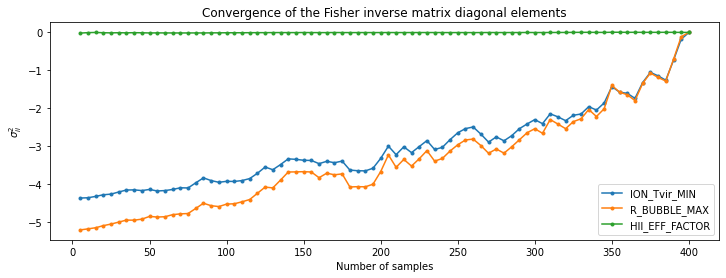

In [36]:
params = ['ION_Tvir_MIN','R_BUBBLE_MAX','HII_EFF_FACTOR']

plt.figure(figsize=(12, 4))
for i, param in enumerate(params):
    plt.plot(samples, [np.diag(PS_Fisher_Inv[k])[i]-np.diag(PS_Fisher_Inv[-1])[i] for k in range(samples.size)], marker='.', label=param)
plt.legend()
plt.ylabel(r'$\sigma^2_{ii}$')
plt.xlabel('Number of samples')
plt.title('Convergence of the Fisher inverse matrix diagonal elements')

In [37]:
PS_Fisher_Inv[-1]

array([[ 4.40481429, -4.77207629,  0.08516638],
       [-4.77207629,  5.24866352, -0.13818532],
       [ 0.08516638, -0.13818532,  0.02891113]])

In [40]:
fid = [50118.72336272725,15,30]
fisher_data = np.random.multivariate_normal(fid, PS_Fisher_Inv[-1], size=50000)

In [31]:
Fisher_Param = ['$T_{Vir}$','$R_{Max}$','$\zeta$']

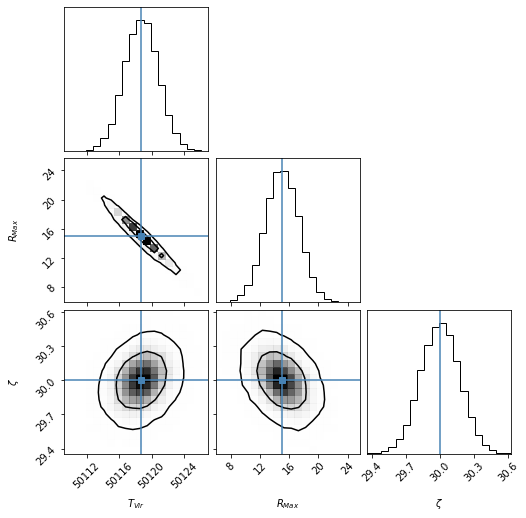

In [41]:
import corner

_ = corner.corner(
    fisher_data,
    labels=Fisher_Param,
    plot_datapoints=False,  
    levels=(0.68,0.95),
    truths=fid)